In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
fulldata = pd.read_csv('sampledata.csv')

In [4]:
fulldata.head(5)

,Unnamed: 0,x_op,y_cs,y_btu,x_WF,y_af1,y_af2,x_9a,x_9b,x_7a,...,x_nb,x_10a,x_wsh1,x_wsh2,x_cs,x_cn,x_co,x_cd,y_fg,x_ash
0,a-12-01 00:00:00,316.70,134.69,39.37,65.29,312.83,1133.40,590.28,588.85,568.26,...,320.99,501.21,28.30,8.11,28.46,40.44,6.95,4.81,69711.30,15.76
1,a-12-01 00:10:00,315.50,134.67,39.25,65.33,313.60,1137.74,590.91,590.08,569.35,...,320.71,501.50,27.65,11.91,27.68,39.66,7.01,4.84,68532.25,15.31
2,a-12-01 00:20:00,317.26,134.29,39.17,65.33,312.83,1125.20,591.68,591.52,568.88,...,320.81,502.71,30.61,13.32,27.57,34.91,6.89,4.75,70371.39,14.11
3,a-12-01 00:30:00,318.12,133.91,39.14,65.21,312.81,1129.18,592.04,592.54,569.40,...,320.89,503.44,32.07,13.57,27.72,36.02,6.93,4.74,69417.63,13.83
4,a-12-01 00:40:00,315.81,133.67,39.07,65.08,312.44,1125.24,593.67,593.15,569.03,...,321.24,503.58,35.37,13.79,27.72,36.48,7.01,4.80,67943.85,14.40


In [5]:
y_data = fulldata.filter(regex='y_')
x_data = fulldata.filter(regex='x_')

In [34]:
len(x_data)

1008

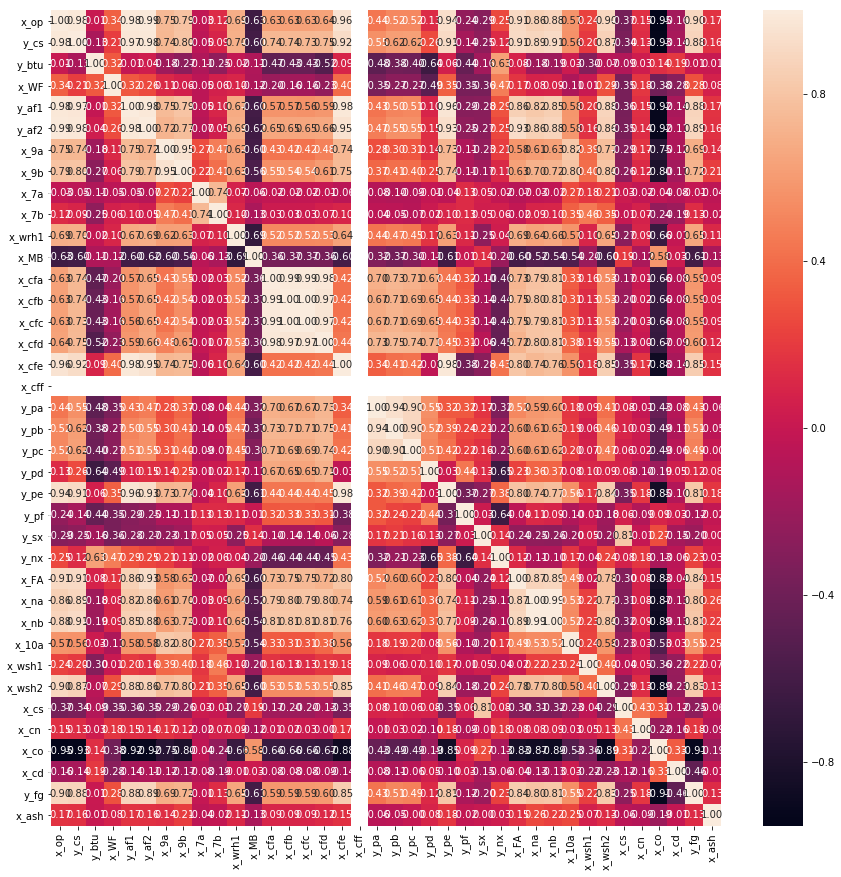

In [9]:
cor = fulldata.corr()
plt.figure(figsize =(15,15))
sns.heatmap(cor, annot = True, fmt = '.2f')

C:\Users\lijbd\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\lijbd\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\lijbd\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\lijbd\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
C:\Users\lijbd\Anaconda3\lib\sit

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002651ACC06A0>,
        ...,
        ...,
        ...,
       ...,
        ...,
        ...,
        ...,
      dtype=object)

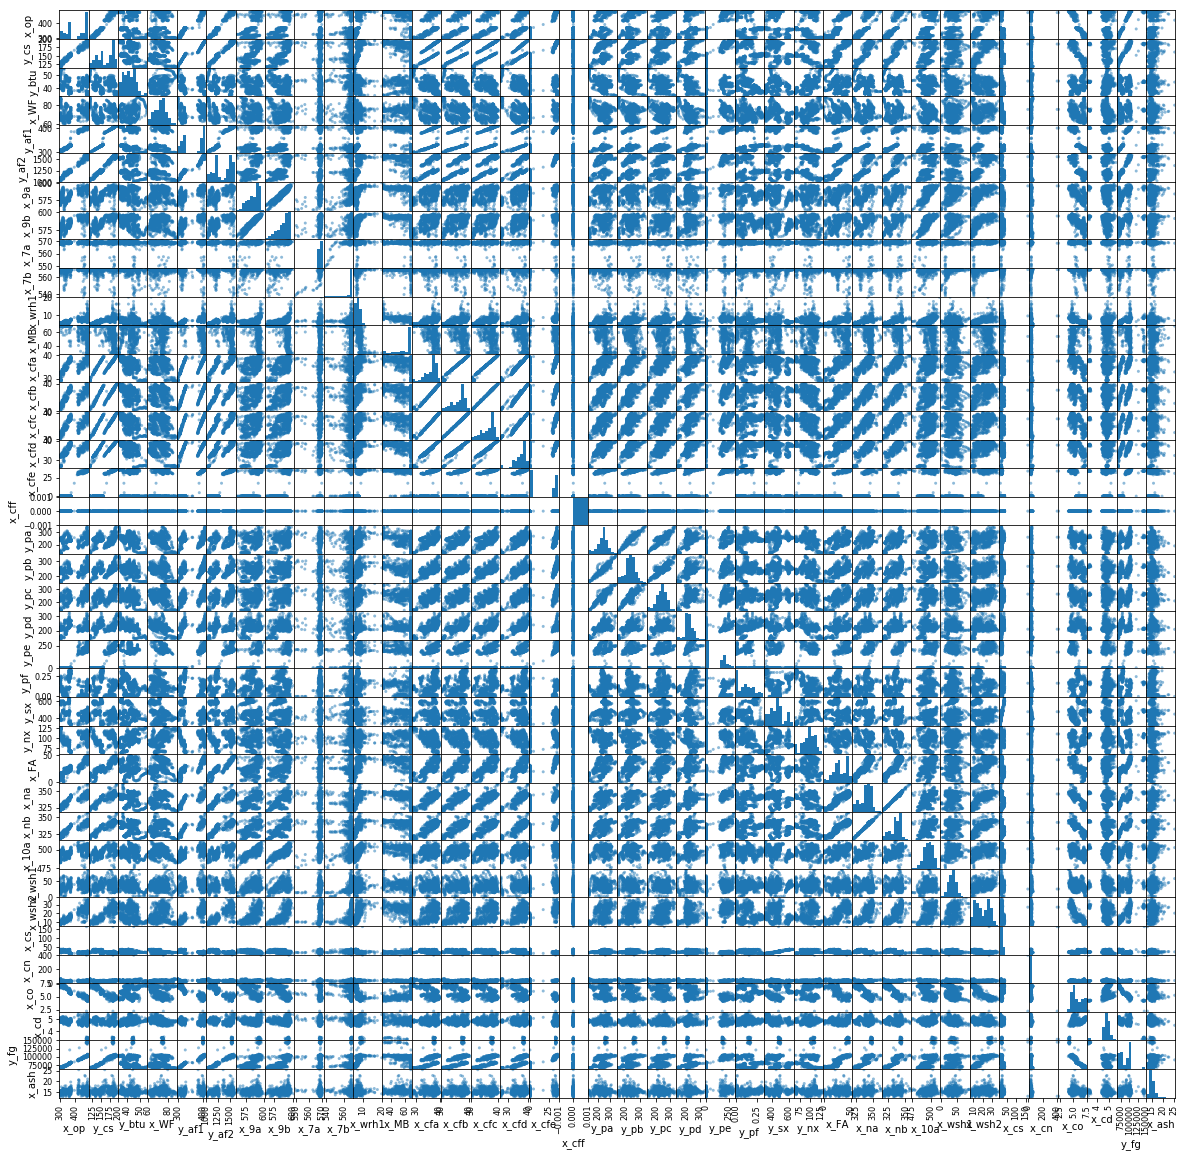

In [10]:
from pandas.plotting import scatter_matrix
check = fulldata
scatter_matrix(check, figsize = (20, 20))

In [14]:
cor['y_cs'].sort_values()

x_co     -0.934902
x_MB     -0.602316
x_cs     -0.336637
y_sx     -0.254121
y_pf     -0.144418
x_cd     -0.140278
y_btu    -0.134130
x_7a     -0.049757
x_7b      0.090725
y_nx      0.122673
x_cn      0.131961
x_ash     0.156578
x_wsh1    0.198161
x_WF      0.210808
y_pd      0.264820
y_pa      0.551256
x_10a     0.558401
y_pb      0.617459
y_pc      0.618791
x_wrh1    0.696101
x_cfc     0.734634
x_cfb     0.735046
x_9a      0.735262
x_cfa     0.735327
x_cfd     0.748164
x_9b      0.798742
x_wsh2    0.865128
y_fg      0.881744
x_na      0.888466
x_FA      0.912290
y_pe      0.913078
x_nb      0.914787
x_cfe     0.921338
y_af1     0.972721
x_op      0.980102
y_af2     0.983238
y_cs      1.000000
x_cff          NaN
Name: y_cs, dtype: float64

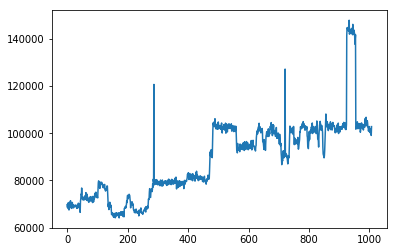

In [13]:
fulldata.y_fg.plot()

## fg값 클러스터링

In [7]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

In [8]:
#dbscan
scaler = StandardScaler()
scaler.fit(fulldata[['y_fg', 'x_op']])
x_scaled = scaler.transform(fulldata[['y_fg','x_op']])

agg = DBSCAN()
cluster1 = pd.DataFrame(agg.fit_predict(x_scaled))
cluster1.columns = ['cluster']
cluster1.index = fulldata.index
result_clust = pd.concat([fulldata, cluster1], axis = 1)

In [9]:
clst = result_clust[['y_fg','x_op','cluster']]
result_clust.to_csv('fulldata_clust.csv', mode = 'w')

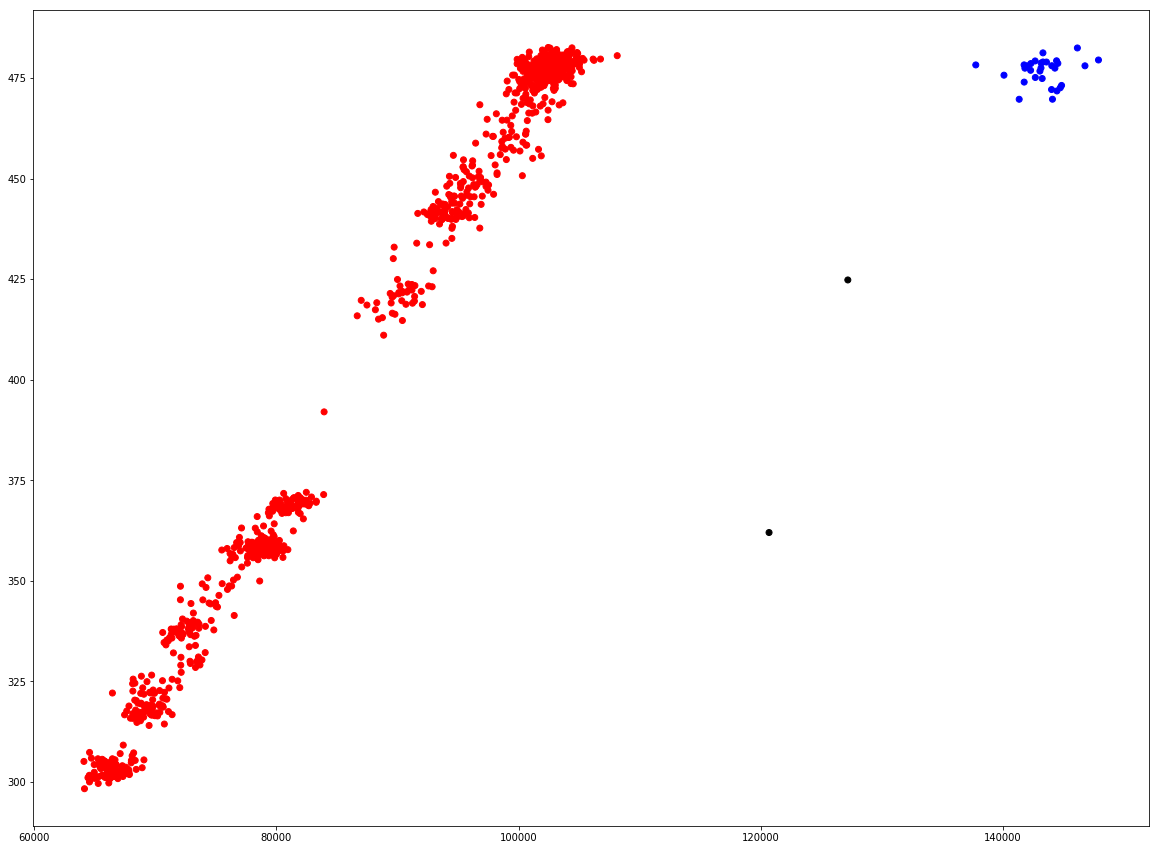

In [50]:
col = []
for i in range(0,len(clst)):
    if clst.cluster[i]==0:
        col.append('r')
    elif clst.cluster[i]==1:
        col.append('b')
    else:
        col.append('k')==-1
        
plt.figure(figsize =(20,15))
plt.scatter(x=clst['y_fg'], y=clst['x_op'], c = col)

In [10]:
data_a = result_clust[result_clust['cluster']==0]
data_b = result_clust[result_clust['cluster']==1]
data_c = result_clust[result_clust['cluster']==-1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002653CA1BF60>,
      dtype=object)

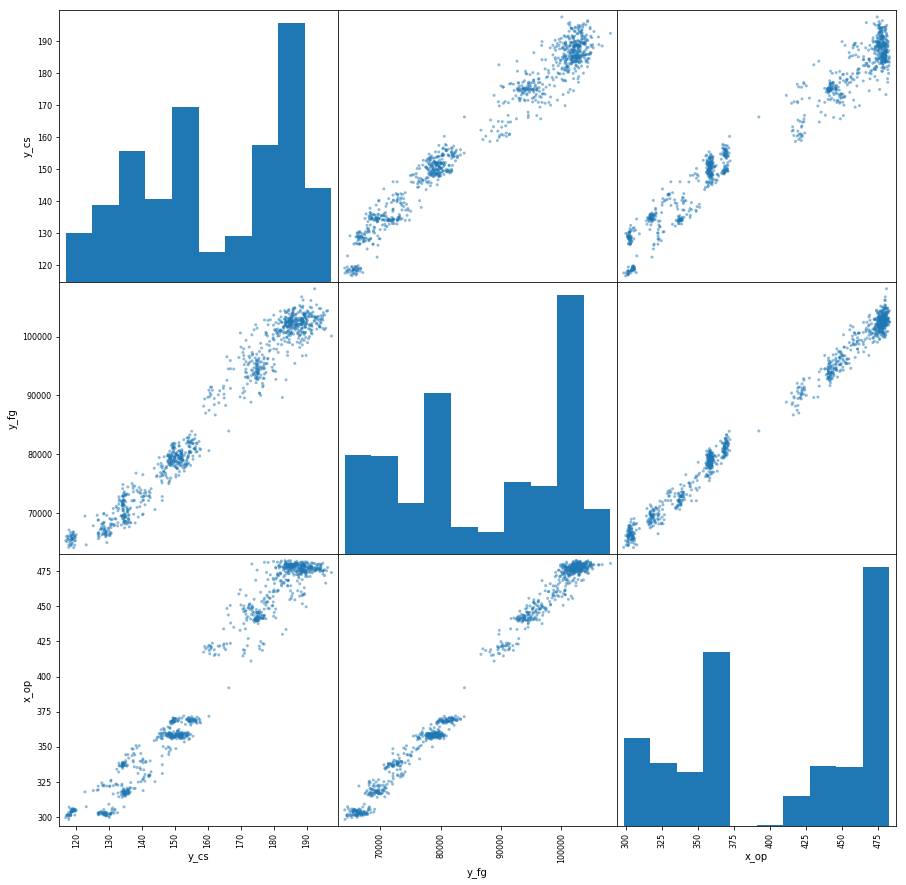

In [25]:
ytest_a = data_a[['y_cs','y_fg','x_op']]
cor_a = ytest_a.corr()
scatter_matrix(ytest_a, figsize = (15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002653CA0BEF0>,
      dtype=object)

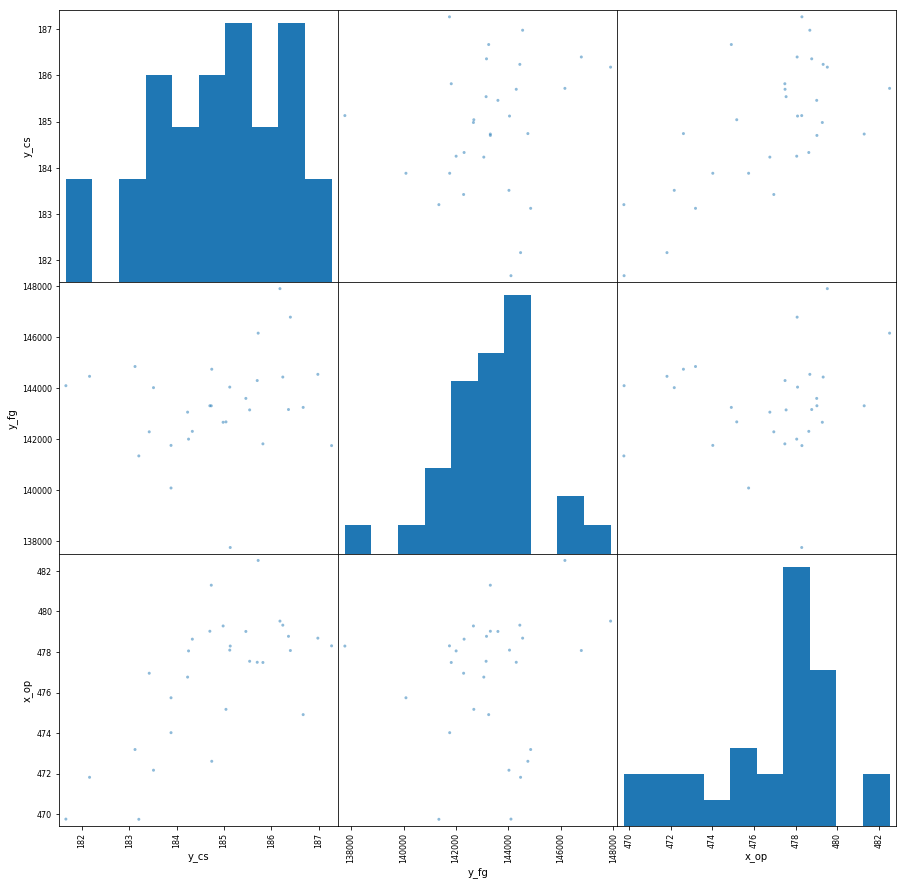

In [26]:
ytest_b = data_b[['y_cs','y_fg','x_op']]
cor_b = ytest_b.corr()
scatter_matrix(ytest_b, figsize = (15,15))

In [27]:
cor_a

,y_cs,y_fg,x_op
y_cs,1.000000,0.983097,0.979747
y_fg,0.983097,1.000000,0.995064
x_op,0.979747,0.995064,1.000000


In [28]:
cor_b

,y_cs,y_fg,x_op
y_cs,1.000000,0.171235,0.676377
y_fg,0.171235,1.000000,0.110962
x_op,0.676377,0.110962,1.000000


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import SVG

In [12]:
tree_y = result_clust.cluster
tree_x = result_clust.drop(['cluster','Unnamed: 0'], axis = 1)

In [13]:
tree_y.describe()

count    1008.000000
mean        0.027778
std         0.176083
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: cluster, dtype: float64

In [14]:
tree = DecisionTreeClassifier(random_state=0)
dtree = tree.fit(tree_x, tree_y)

In [ ]:
graph = Source(export_graphviz(dtree, out_file=None, class_names = ['data_a','data_b','data_c'], feature_names = tree_x.columns))
SVG(graph.pipe(format='svg'))

In [16]:
n_features = tree_x.shape[1]
pd.DataFrame({'Feature_importances': dtree.feature_importances_}, index = tree_x.columns).sort_values(by='Feature_importances', ascending=False).head(10)

,Feature_importances
y_fg,0.939601
y_btu,0.060399
x_op,0.000000
x_nb,0.000000
y_pe,0.000000
y_pf,0.000000
y_sx,0.000000
y_nx,0.000000
x_FA,0.000000
x_na,0.000000


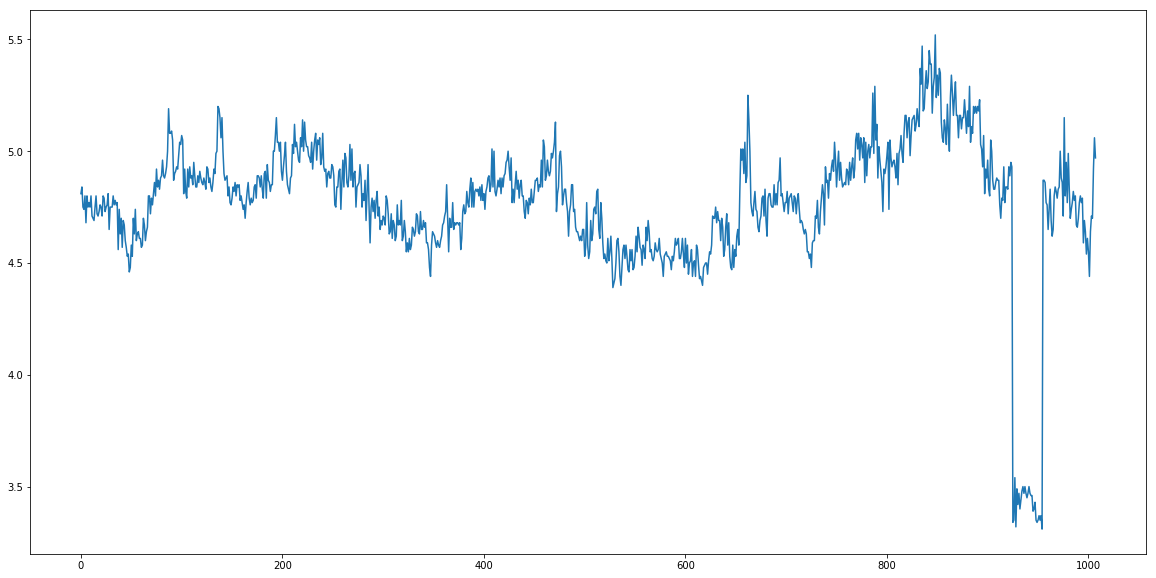

In [17]:
plt.figure(figsize=(20,10))
tree_x.x_cd.plot()

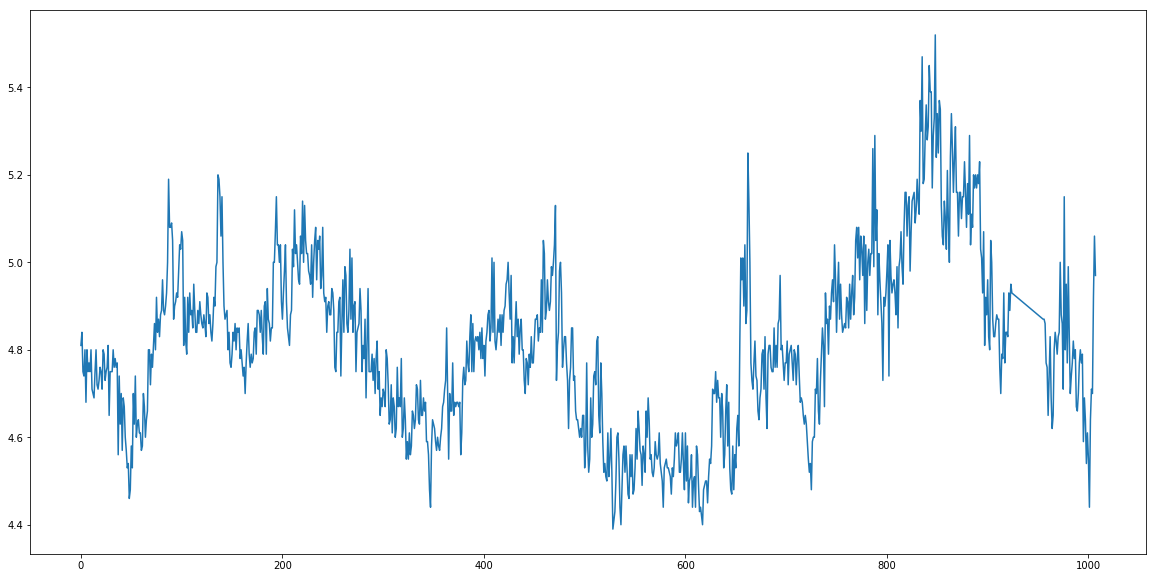

In [18]:
plt.figure(figsize=(20,10))
data_a.x_cd.plot()

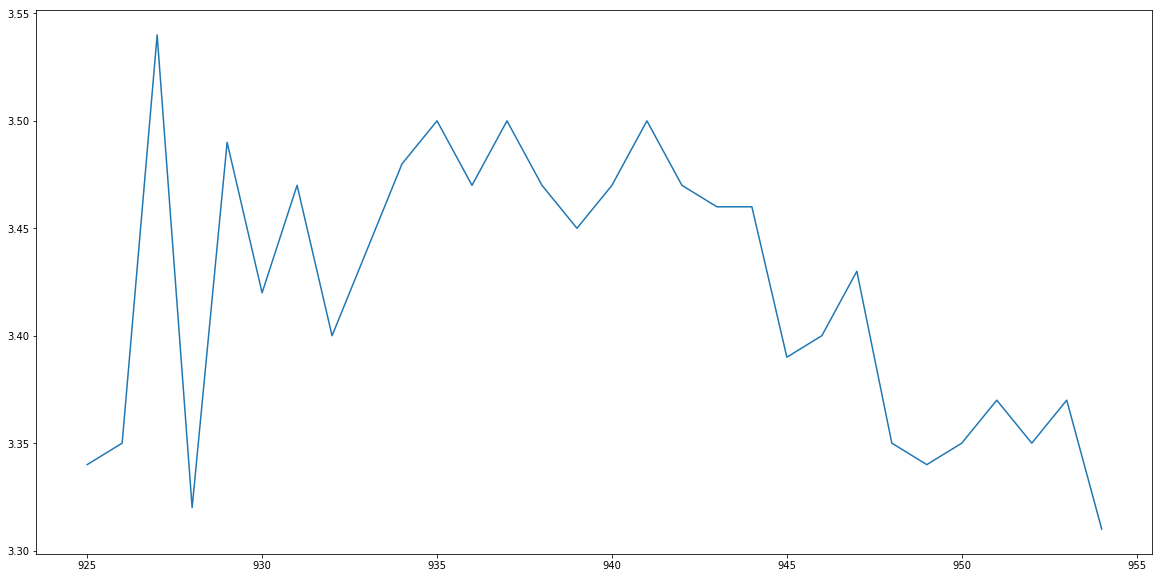

In [19]:
plt.figure(figsize=(20,10))
data_b.x_cd.plot()

In [21]:
print(len(data_a))
print(len(data_b))

976
30


In [22]:
data_a.to_csv('fulldata_a.csv', mode = 'w')
data_b.to_csv('fulldata_b.csv', mode = 'w')

## 엑셀에서 index이름을 'Index'로 지정

In [27]:
data_a = pd.read_csv('fulldata_a.csv')
data_b = pd.read_csv('fulldata_b.csv')
data_f = pd.read_csv('fulldata_clust.csv')

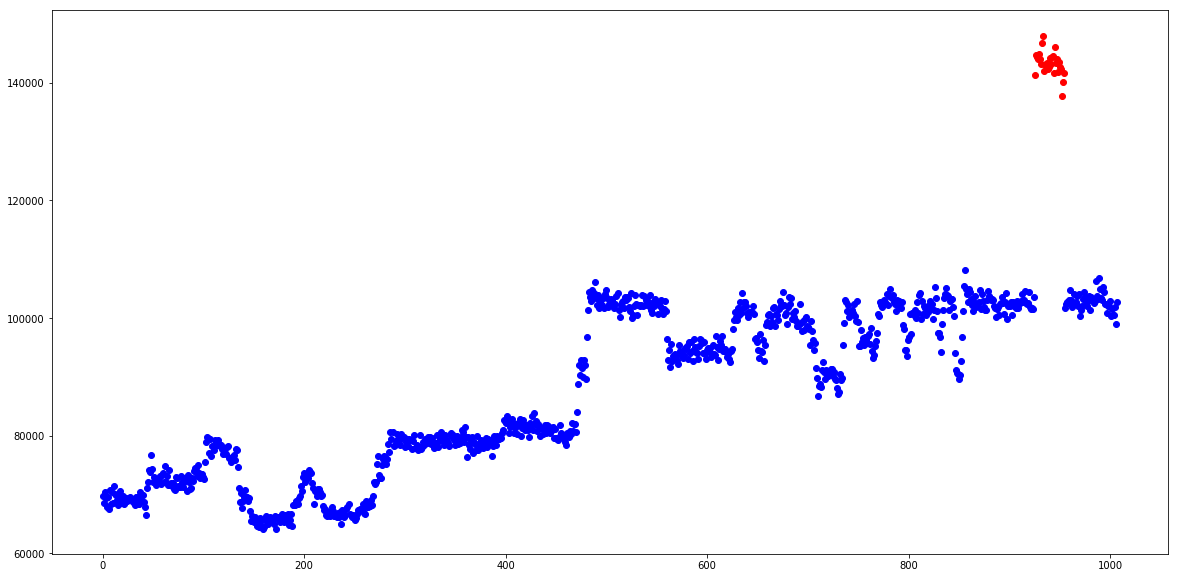

In [28]:
plt.figure(figsize =(20,10))
plt.scatter(data_a.Index, data_a.y_fg, color = 'b')
plt.scatter(data_b.Index, data_b.y_fg, color = 'r')

In [29]:
data_a = data_a.drop('cluster', axis=1)
data_b = data_b.drop('cluster', axis=1)

# Prediction

In [57]:
x_data = pd.DataFrame(data_a.filter(regex='x_'))
y_data = pd.DataFrame(data_a['y_cs'])
data = pd.concat([x_data, y_data], axis = 1)

In [58]:
y_data.columns

Index(['y_cs'], dtype='object')

In [59]:
x_data_2 = pd.DataFrame(data_b.filter(regex = 'x_'))
y_data_2 = pd.DataFrame(data_b.y_cs)
data_2 = pd.concat([x_data_2, y_data_2], axis=1)

In [60]:
y_data_2.columns

Index(['y_cs'], dtype='object')

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, random_state = 0)
x_train_2, x_val_2, y_train_2, y_val_2 = train_test_split(x_data_2, y_data_2, random_state = 0)

In [64]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)
print(x_train_2.shape, x_val_2.shape, y_train_2.shape, y_val_2.shape)

(732, 25) (244, 25) (732, 1) (244, 1)
(22, 25) (8, 25) (22, 1) (8, 1)


# 특성 스케일링

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler3 = MinMaxScaler()
scaler3.fit(x_train)
x_train_scaled = scaler3.transform(x_train)
x_val_scaled = scaler3.transform(x_val)

scaler4 = MinMaxScaler()
scaler4.fit(x_train_2)
x_train_2_scaled = scaler4.transform(x_train_2)
x_val_2_scaled = scaler4.transform(x_val_2)

C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# Modeling_Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [117]:
lin_reg1 = LinearRegression()
lin_reg1.fit(x_train_scaled, y_train)
lin_mse = mean_squared_error(y_val, lin_reg1.fit(x_train_scaled, y_train).predict(x_val_scaled))
print('a)훈련 세트 점수 :{:.2f}'.format(lin_reg1.fit(x_train_scaled, y_train).score(x_train_scaled, y_train)))
print('a)검증 세트 점수 :{:.2f}'.format(lin_reg1.fit(x_train_scaled, y_train).score(x_val_scaled, y_val)))

lin_reg2 = LinearRegression()
lin_reg2.fit(x_train_2_scaled, y_train_2)
lin_mse_2 = mean_squared_error(y_val_2, lin_reg2.fit(x_train_2_scaled, y_train_2).predict(x_val_2_scaled))
print('b)훈련 세트 점수 :{:.2f}'.format(lin_reg2.fit(x_train_2_scaled, y_train_2).score(x_train_2_scaled, y_train_2)))
print('b)검증 세트 점수 :{:.2f}'.format(lin_reg2.fit(x_train_2_scaled, y_train_2).score(x_val_2_scaled, y_val_2)))\

a)훈련 세트 점수 :1.00
a)검증 세트 점수 :1.00
b)훈련 세트 점수 :1.00
b)검증 세트 점수 :0.77


# Modeling_ElasticNet Regression

### GridSerchCV

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [116]:
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100,1000],
             'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9, 1]}
grid_search = GridSearchCV(ElasticNet(), param_grid, cv = 5)
grid_search.fit(x_train_scaled, y_train)
elst_mse = mean_squared_error(y_val, grid_search.fit(x_train_scaled, y_train).predict(x_val_scaled))
print('a)최적 매개 변수:{}'.format(grid_search.best_params_))
print('a)훈련 세트 점수:{:.2f}'.format(grid_search.fit(x_train_scaled, y_train).score(x_train_scaled, y_train)))
print('a)검증 세트 점수:{:.2f}'.format(grid_search.fit(x_train_scaled, y_train).score(x_val_scaled, y_val)))

param_grid = {'alpha':[0.001,0.01,0.1,1,10,100,1000],
             'l1_ratio':[0.1, 0.3, 0.5, 0.7, 0.9, 1]}
grid_search2 = GridSearchCV(ElasticNet(), param_grid, cv = 5)
grid_search2.fit(x_train_2_scaled, y_train_2)
elst_mse_2 = mean_squared_error(y_val_2, grid_search.fit(x_train_2_scaled, y_train_2).predict(x_val_2_scaled))
print('b)최적 매개 변수:{}'.format(grid_search2.best_params_))
print('b)훈련 세트 점수:{:.2f}'.format(grid_search2.fit(x_train_2_scaled, y_train_2).score(x_train_2_scaled, y_train_2)))
print('b)검증 세트 점수:{:.2f}'.format(grid_search2.fit(x_train_2_scaled, y_train_2).score(x_val_2_scaled, y_val_2)))

a)최적 매개 변수:{'alpha': 0.001, 'l1_ratio': 1}
a)훈련 세트 점수:1.00
a)검증 세트 점수:1.00


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


b)최적 매개 변수:{'alpha': 0.001, 'l1_ratio': 0.1}


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


b)훈련 세트 점수:1.00
b)검증 세트 점수:0.95


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Modeling_SVM Regression

### GridSerchCV

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

In [114]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000],
             'epsilon':[0.001,0.01,0.1,1,10,100,1000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv = 5)
grid_search.fit(x_train_scaled, y_train)
svr_mse = mean_squared_error(y_val, grid_search.fit(x_train_scaled, y_train).predict(x_val_scaled)) 
print('a)최적 매개 변수:{}'.format(grid_search.best_params_))
print('a)훈련 세트 점수:{:.2f}'.format(grid_search.fit(x_train_scaled, y_train).score(x_train_scaled, y_train)))
print('a)검증 세트 점수:{:.2f}'.format(grid_search.fit(x_train_scaled, y_train).score(x_val_scaled, y_val)))

param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000],
             'epsilon':[0.001,0.01,0.1,1,10,100,1000]}
grid_search = GridSearchCV(LinearSVR(), param_grid, cv = 5)
grid_search2.fit(x_train_2_scaled, y_train_2)
svr_mse_2 = mean_squared_error(y_val_2, grid_search.fit(x_train_2_scaled, y_train_2).predict(x_val_2_scaled)) 
print('b)최적 매개 변수:{}'.format(grid_search2.best_params_))
print('b)훈련 세트 점수:{:.2f}'.format(grid_search2.fit(x_train_2_scaled, y_train_2).score(x_train_2_scaled, y_train_2)))
print('b)검증 세트 점수:{:.2f}'.format(grid_search2.fit(x_train_2_scaled, y_train_2).score(x_val_2_scaled, y_val_2)))

C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

a)최적 매개 변수:{'C': 100, 'epsilon': 0.1}


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

a)훈련 세트 점수:1.00


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

a)검증 세트 점수:1.00


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

b)최적 매개 변수:{'alpha': 0.001, 'l1_ratio': 0.1}


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


b)훈련 세트 점수:1.00
b)검증 세트 점수:0.95


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Modeling_XGBoost Regression

### GridSerchCV

In [109]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

In [113]:
param_grid = {'leanring_rate':[0.001,0.01,0.1,1,10,100,1000],
             'n_estimators':[1,10,100,1000]}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv = 5)
grid_search.fit(x_train_scaled, y_train)
xgb_mse = mean_squared_error(y_val, grid_search.fit(x_train_scaled, y_train).predict(x_val_scaled)) 
print('a)최적 매개 변수:{}'.format(grid_search.best_params_))
print('a)훈련 세트 점수:{:.2f}'.format(grid_search.fit(x_train_scaled, y_train).score(x_train_scaled, y_train)))
print('a)검증 세트 점수:{:.2f}'.format(grid_search.fit(x_train_scaled, y_train).score(x_val_scaled, y_val)))

param_grid = {'leanring_rate':[0.001,0.01,0.1,1,10,100,1000],
             'n_estimators':[1,10,100,1000]}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv = 5)
grid_search2.fit(x_train_2_scaled, y_train_2)
xgb_mse_2 = mean_squared_error(y_val_2, grid_search.fit(x_train_2_scaled, y_train_2).predict(x_val_2_scaled)) 
print('b)최적 매개 변수:{}'.format(grid_search2.best_params_))
print('b)훈련 세트 점수:{:.2f}'.format(grid_search2.fit(x_train_2_scaled, y_train_2).score(x_train_2_scaled, y_train_2)))
print('b)검증 세트 점수:{:.2f}'.format(grid_search2.fit(x_train_2_scaled, y_train_2).score(x_val_2_scaled, y_val_2)))

C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


a)최적 매개 변수:{'leanring_rate': 0.001, 'n_estimators': 1000}


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


a)훈련 세트 점수:1.00


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


a)검증 세트 점수:1.00


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


b)최적 매개 변수:{'alpha': 0.001, 'l1_ratio': 0.1}


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


b)훈련 세트 점수:1.00
b)검증 세트 점수:0.95


C:\Users\lijbd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# 각 모델의 MSE 비교

### data_a

In [124]:
print('Linear:{:.2f}'.format(lin_mse))
print('Elastic:{:.2f}'.format(elst_mse))
print('svr:{:.2f}'.format(svr_mse))
print('xgb:{:.2f}'.format(xgb_mse))

Linear:0.07
Elastic:0.08
svr:0.09
xgb:0.74


### data_b

In [125]:
print('Linear:{:.2f}'.format(lin_mse_2))
print('Elastic:{:.2f}'.format(elst_mse_2))
print('svr:{:.2f}'.format(svr_mse_2))
print('xbg:{:.2f}'.format(xgb_mse_2))

Linear:0.26
Elastic:0.06
svr:167.89
xbg:0.13
